In [59]:
#P9 P2 P3 
#P8 P1 P4 
#p7 P6 P5

#step1
#Condition 0: The pixel is 1 and has eight neighbours 
#Condition 1: 2 < = N(P1) < = 6 
#Condition 2: S(P1) = 1
#Condition 3: P2 * P4 * P6 = 0 
#Condition 4: P4 * P6 * P8 = 0 

#step2

#Condition 0: The pixel is 1 and has eight neighbours 
#Condition 1: 2 < = N(P1) < = 6  
#Condition 2: S(P1) = 1   
#Condition 3: P2 * P4 * P8 = 0   
#Condition 4: P2 * P6 * P8 = 0   

In [84]:
import struct
from PIL import Image
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import skimage.io as io
from skimage.filters import threshold_otsu
from PIL import Image

%matplotlib inline

In [85]:
#씨닝알고리즘 함수
def neighbours(x,y,image):
    "해당하는 점에 대하여 주변 픽셀 8개를 지정해줌"
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
                img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9


def transitions(neighbours):
    "주변 픽셀을 9시방향부터 시작하여 시계방향으로 돌렸을 때 두픽셀이 0->1로 되는 갯수"
    n = neighbours + neighbours[0:1]      # P2, P3, ... , P8, P9, P2
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)


def zhangSuen(image):
    "the Zhang-Suen Thinning Algorithm"
    Image_Thinned = image.copy()  # 이미지를 복사하여 넣음
    changing1 = changing2 = 1        #  초기는 시작을 하기위해 1로 지정
    while changing1 or changing2:   #  step1과 step2가 더이상 만족하지 못할 때 반복문을 나감
        # Step 1
        changing1 = []
        rows, columns = Image_Thinned.shape               # x for rows, y for columns
        for x in range(1, rows - 1):                     # No. of  rows
            for y in range(1, columns - 1):            # No. of columns
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1     and    # Condition 0: 해당 픽셀이 검은색인지 
                    2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6 
                    transitions(n) == 1 and    # Condition 2: S(P1)=1  
                    P2 * P4 * P6 == 0  and    # Condition 3   
                    P4 * P6 * P8 == 0):         # Condition 4
                    changing1.append((x,y))
        for x, y in changing1: 
            Image_Thinned[x][y] = 0
        # Step 2
        changing2 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1   and        # Condition 0
                    2 <= sum(n) <= 6  and       # Condition 1
                    transitions(n) == 1 and      # Condition 2
                    P2 * P4 * P8 == 0 and       # Condition 3
                    P2 * P6 * P8 == 0):            # Condition 4
                    changing2.append((x,y))    
        for x, y in changing2: 
            Image_Thinned[x][y] = 0
    return Image_Thinned




In [ ]:
## 씨닝알고리즘 적용된 이미지 저장

with open('rec.dat', 'rb') as f:

    num_of_digit_b = f.read(4) #숫자의 총 갯수
    num_of_digit = struct.unpack('i',num_of_digit_b)
    num_of_digit = num_of_digit[0]
    
    #data=[] #이미지의 정보
    
    a=0 
    while True:

        figure = f.read(1) # 해당숫자
        if not figure: break 
        #if not figure==b'0': break

        width_b = f.read(4) #가로
        width = struct.unpack('i',width_b)
        
        height_b = f.read(4) #세로
        height = struct.unpack('i',height_b)

        temp=np.zeros((width[0],height[0]))
        #print(temp)
        for j in range(height[0]):
            for i in range(width[0]):
                binary_pibot_b = f.read(1)
                binary_pibot = struct.unpack('B',binary_pibot_b)

                temp[i][j]=binary_pibot[0]
                
        
        
        
        
        
        Img_Original =  temp
        BW_Skeleton = zhangSuen(Img_Original)
        image = Image.new("RGB",(width[0],height[0]),(255,255,255))
        im = image.load()

        for j in range(height[0]):
            for i in range(width[0]):

                color = 255 * (1-int(BW_Skeleton[i][j]))

                im[i,j] = (color,color,color)

        
        image.save("dataset/0dataset/test{0}.jpg".format(a))
        image.close()
        a+=1
                





    


In [83]:
# main문

Img_Original =  data[0]
BW_Skeleton = zhangSuen(Img_Original)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=24x33 at 0x1A3E3E48D68>
24 33


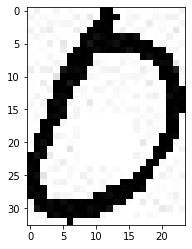

In [73]:
img = Image.open("dataset/1.jpg")
print(img)
width, height = img.size
imshow(np.asarray(img))
print(width, height)
img.close()

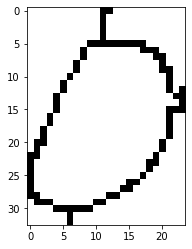

In [82]:
"Display the results"
image = Image.new("RGB",(width[0],height[0]),(255,255,255))
im = image.load()

for j in range(height[0]):
    for i in range(width[0]):
        
        color = 255 * (1-int(BW_Skeleton[i][j]))

        im[i,j] = (color,color,color)

imshow(np.asarray(image))
image.save("dataset/0dataset/test1.jpg")
image.close()

In [ ]:
# rec.dat -> jpg 파일들로 변환 
import struct
from PIL import Image

with open('rec.dat', 'rb') as f:

    num_of_digit_b = f.read(4)
    num_of_digit = struct.unpack('i',num_of_digit_b)
    num_of_digit = num_of_digit[0]
    data=[]
    a=0
    while True:

        figure = f.read(1)
        if not figure: break

        width_b = f.read(4)
        width = struct.unpack('i',width_b)

        height_b = f.read(4)
        height = struct.unpack('i',height_b)

        image = Image.new("RGB",(width[0],height[0]),(255,255,255))
        im = image.load()

        for j in range(height[0]):
            for i in range(width[0]):
                binary_pibot_b = f.read(1)
                binary_pibot = struct.unpack('B',binary_pibot_b)

                color = 255 * (1-binary_pibot[0])

                im[i,j] = (color,color,color)

        
        image.save("dataset/{0}.jpg".format(a))
        


    
